In [1]:
import pandas as pd
from pandas_datareader import data as dt #will be used to download data from yahoo finance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
from scipy.stats import pearsonr
from scipy.stats import ttest_ind #Independent Sample T-test
from scipy.stats import f_oneway #One-Way ANOVA
init_notebook_mode(connected=True)

In [2]:
wd=pd.read_excel("wine.xlsx",sheet_name='Transactions')

In [3]:
wd.head()

,Customer Last Name,Offer #,Gender,Discount,Varietal,Customer_Segment,Minimum Qty (kg),Origin,Campaign,Past Peak
0,Smith,2,Male,17,Pinot Noir,Segment 4,72,France,January,False
1,Smith,24,Male,34,Pinot Noir,Segment 4,6,Italy,September,False
2,Johnson,17,Male,47,Pinot Noir,Segment 4,12,Germany,July,False
3,Johnson,24,Male,34,Pinot Noir,Segment 4,6,Italy,September,False
4,Johnson,26,Male,83,Pinot Noir,Segment 4,144,Australia,October,False


In [4]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer Last Name  324 non-null    object
 1   Offer #             324 non-null    int64 
 2   Gender              324 non-null    object
 3   Discount            324 non-null    int64 
 4   Varietal            324 non-null    object
 5   Customer_Segment    324 non-null    object
 6   Minimum Qty (kg)    324 non-null    int64 
 7   Origin              324 non-null    object
 8   Campaign            324 non-null    object
 9   Past Peak           324 non-null    bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 23.2+ KB


In [5]:
wd.shape

(324, 10)

In [6]:
wd.isna().sum()

Customer Last Name    0
Offer #               0
Gender                0
Discount              0
Varietal              0
Customer_Segment      0
Minimum Qty (kg)      0
Origin                0
Campaign              0
Past Peak             0
dtype: int64

In [7]:
wd.Varietal.unique()

array(['Pinot Noir', 'Espumante', 'Champagne', 'Prosecco', 'Pinot Grigio',
       'Malbec', 'Merlot', 'Cabernet Sauvignon', 'Chardonnay'],
      dtype=object)

In [8]:
wd.Varietal.nunique()

9

In [9]:
def discount_range(discount):
    if discount<30:
        return "Up to 30"
    elif discount>=30 and discount<=60:
        return "[30,60]"
    else:
        return "more than 60"

In [10]:
discount_range(15)

'Up to 30'

In [11]:
wd.Discount[0]

17

In [12]:
discount_range(wd.Discount[0])

'Up to 30'

In [13]:
discount_range(wd.Discount[4])

'more than 60'

In [14]:
for i in range(10):
    print(wd['Customer Last Name'][i],discount_range(wd.Discount[i]))

Smith Up to 30
Smith [30,60]
Johnson [30,60]
Johnson [30,60]
Johnson more than 60
Williams [30,60]
Williams more than 60
Williams more than 60
Brown [30,60]
Brown more than 60


In [15]:
wd['Discount_name']=wd.Discount.apply(discount_range)

In [16]:
wd.head()

,Customer Last Name,Offer #,Gender,Discount,Varietal,Customer_Segment,Minimum Qty (kg),Origin,Campaign,Past Peak,Discount_name
0,Smith,2,Male,17,Pinot Noir,Segment 4,72,France,January,False,Up to 30
1,Smith,24,Male,34,Pinot Noir,Segment 4,6,Italy,September,False,"[30,60]"
2,Johnson,17,Male,47,Pinot Noir,Segment 4,12,Germany,July,False,"[30,60]"
3,Johnson,24,Male,34,Pinot Noir,Segment 4,6,Italy,September,False,"[30,60]"
4,Johnson,26,Male,83,Pinot Noir,Segment 4,144,Australia,October,False,more than 60


In [17]:
wd.isna().sum()

Customer Last Name    0
Offer #               0
Gender                0
Discount              0
Varietal              0
Customer_Segment      0
Minimum Qty (kg)      0
Origin                0
Campaign              0
Past Peak             0
Discount_name         0
dtype: int64

In [18]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer Last Name  324 non-null    object
 1   Offer #             324 non-null    int64 
 2   Gender              324 non-null    object
 3   Discount            324 non-null    int64 
 4   Varietal            324 non-null    object
 5   Customer_Segment    324 non-null    object
 6   Minimum Qty (kg)    324 non-null    int64 
 7   Origin              324 non-null    object
 8   Campaign            324 non-null    object
 9   Past Peak           324 non-null    bool  
 10  Discount_name       324 non-null    object
dtypes: bool(1), int64(3), object(7)
memory usage: 25.8+ KB


In [19]:
data_num=wd.select_dtypes(include='int64')
data_num.head()

,Offer #,Discount,Minimum Qty (kg)
0,2,17,72
1,24,34,6
2,17,47,12
3,24,34,6
4,26,83,144


In [20]:
data_str=wd.select_dtypes(include=['bool','object'])
data_str.head()

,Customer Last Name,Gender,Varietal,Customer_Segment,Origin,Campaign,Past Peak,Discount_name
0,Smith,Male,Pinot Noir,Segment 4,France,January,False,Up to 30
1,Smith,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
2,Johnson,Male,Pinot Noir,Segment 4,Germany,July,False,"[30,60]"
3,Johnson,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
4,Johnson,Male,Pinot Noir,Segment 4,Australia,October,False,more than 60


In [21]:
data_s=wd.select_dtypes(exclude='int64')
data_s.head()

,Customer Last Name,Gender,Varietal,Customer_Segment,Origin,Campaign,Past Peak,Discount_name
0,Smith,Male,Pinot Noir,Segment 4,France,January,False,Up to 30
1,Smith,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
2,Johnson,Male,Pinot Noir,Segment 4,Germany,July,False,"[30,60]"
3,Johnson,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
4,Johnson,Male,Pinot Noir,Segment 4,Australia,October,False,more than 60


In [22]:
data_num.describe()

,Offer #,Discount,Minimum Qty (kg)
count,324.000000,324.000000,324.000000
mean,17.012346,59.481481,58.407407
std,9.703332,20.327877,49.741444
min,1.000000,17.000000,6.000000
25%,8.000000,45.000000,6.000000
50%,18.000000,56.000000,72.000000
75%,26.000000,83.000000,72.000000
max,32.000000,89.000000,144.000000


In [23]:
data_num.drop('Offer #',axis=1,inplace=True)
data_num.head()

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Discount,Minimum Qty (kg)
0,17,72
1,34,6
2,47,12
3,34,6
4,83,144


In [24]:
for i in data_str.columns:
    print('\n',i,'\n')
    print(data_str[i].value_counts())
    


 Customer Last Name 

Sanders    9
Sanchez    7
Miller     7
Fisher     7
Harris     6
          ..
Ortiz      1
Russell    1
Powell     1
Jones      1
Ward       1
Name: Customer Last Name, Length: 100, dtype: int64

 Gender 

Female    162
Male      162
Name: Gender, dtype: int64

 Varietal 

Champagne             81
Pinot Noir            44
Prosecco              43
Espumante             40
Cabernet Sauvignon    32
Malbec                32
Merlot                20
Pinot Grigio          17
Chardonnay            15
Name: Varietal, dtype: int64

 Customer_Segment 

Segment 1    124
Segment 2     96
Segment 3     73
Segment 4     31
Name: Customer_Segment, dtype: int64

 Origin 

France          128
Australia        39
Chile            37
Oregon           26
South Africa     25
Italy            24
Germany          16
California       16
New Zealand      13
Name: Origin, dtype: int64

 Campaign 

March        51
December     43
August       31
October      30
July         26
May         

In [25]:
data_num.head()

,Discount,Minimum Qty (kg)
0,17,72
1,34,6
2,47,12
3,34,6
4,83,144


In [26]:
data_str.head()

,Customer Last Name,Gender,Varietal,Customer_Segment,Origin,Campaign,Past Peak,Discount_name
0,Smith,Male,Pinot Noir,Segment 4,France,January,False,Up to 30
1,Smith,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
2,Johnson,Male,Pinot Noir,Segment 4,Germany,July,False,"[30,60]"
3,Johnson,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
4,Johnson,Male,Pinot Noir,Segment 4,Australia,October,False,more than 60


In [27]:
wd_join=data_num.join(data_str,how='outer')

In [28]:
wd_join.head()

,Discount,Minimum Qty (kg),Customer Last Name,Gender,Varietal,Customer_Segment,Origin,Campaign,Past Peak,Discount_name
0,17,72,Smith,Male,Pinot Noir,Segment 4,France,January,False,Up to 30
1,34,6,Smith,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
2,47,12,Johnson,Male,Pinot Noir,Segment 4,Germany,July,False,"[30,60]"
3,34,6,Johnson,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
4,83,144,Johnson,Male,Pinot Noir,Segment 4,Australia,October,False,more than 60


# Bar Chart

In [29]:
wd_join.groupby('Varietal')['Discount'].mean()

Varietal
Cabernet Sauvignon    51.625000
Champagne             72.086420
Chardonnay            51.000000
Espumante             44.800000
Malbec                54.625000
Merlot                63.700000
Pinot Grigio          87.000000
Pinot Noir            48.909091
Prosecco              59.790698
Name: Discount, dtype: float64

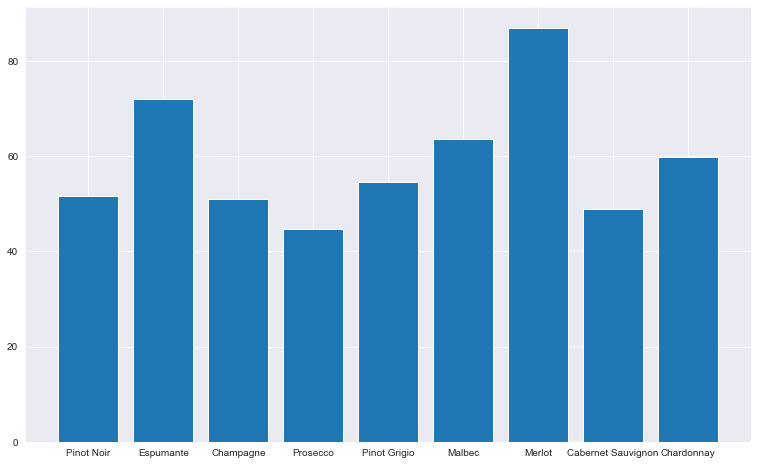

In [30]:
sns.set_style('darkgrid')

plt.figure(figsize=(13,8))

plt.bar(wd_join.Varietal.unique(),
        wd_join.groupby('Varietal')['Discount'].mean())

plt.show()

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



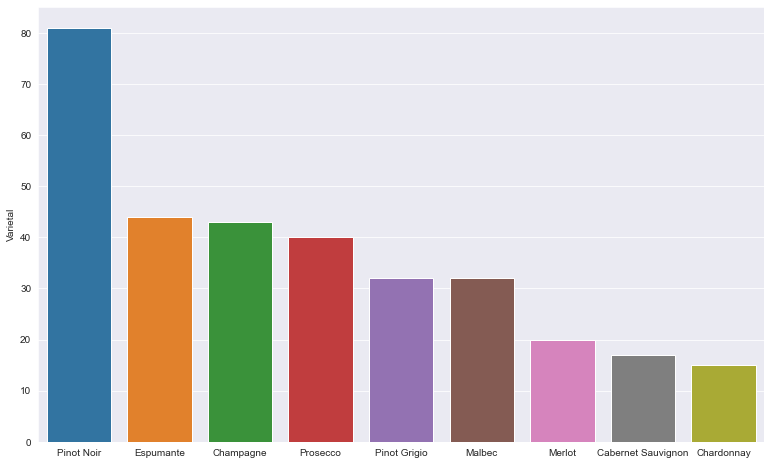

In [31]:
plt.figure(figsize=(13,8))

sns.barplot(wd.Varietal.unique(),
            wd.Varietal.value_counts())


plt.show()

# Histograms

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



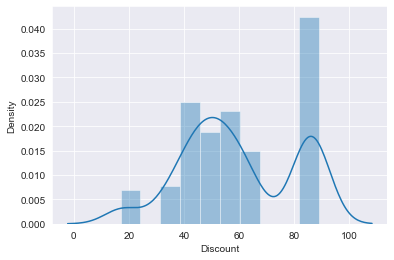

In [32]:
sns.distplot(data_num.Discount,bins=10)
plt.show()

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Discount


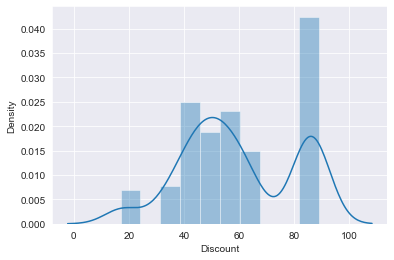

Minimum Qty (kg)


/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



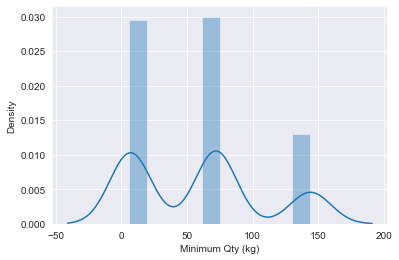

In [33]:
for i in data_num.columns:
    print(i)
    sns.distplot(data_num[i],bins=10)
    plt.show() 

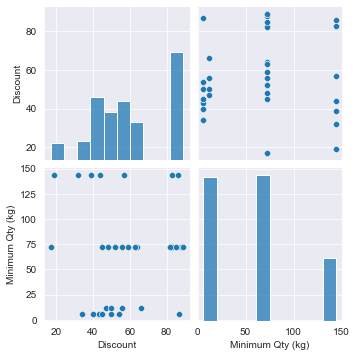

In [34]:
sns.pairplot(data_num)
plt.show()

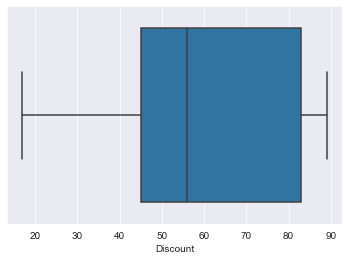

In [35]:
sns.boxplot(x=wd_join.Discount)
plt.show()

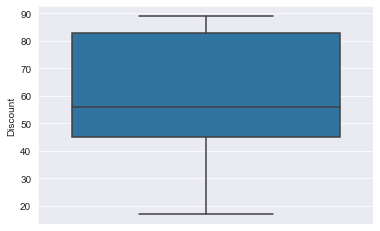

In [36]:
sns.boxplot(y=wd_join.Discount)
plt.show()

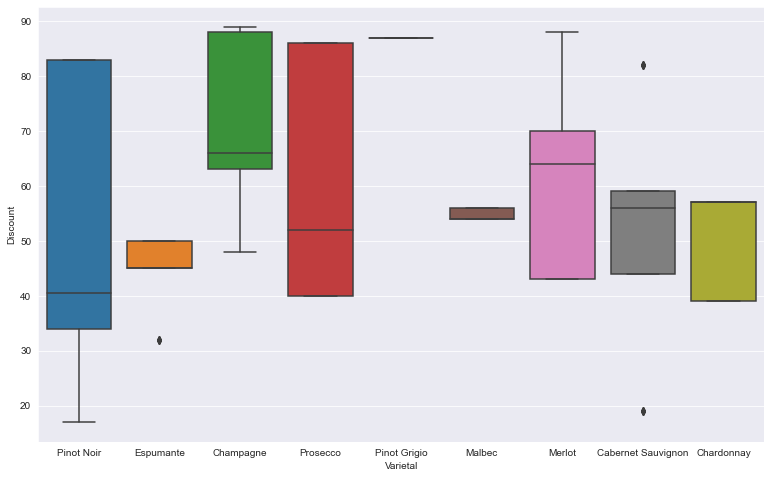

In [37]:
plt.figure(figsize=(13,8))
sns.boxplot(y=wd_join.Discount,x=wd_join.Varietal)
plt.show()

In [38]:
data_num.corr()

,Discount,Minimum Qty (kg)
Discount,1.000000,0.208962
Minimum Qty (kg),0.208962,1.000000


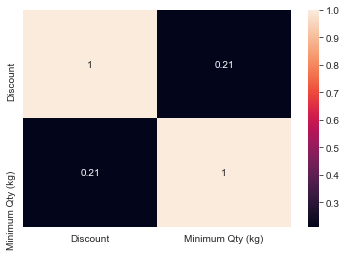

In [39]:
sns.heatmap(data_num.corr(),annot=True)
plt.show()

In [40]:
pearsonr(data_num.Discount,data_num['Minimum Qty (kg)'])

(0.20896189931265607, 0.00015144638556191636)

> first value is correlation coefficient, second value is p-value. In our case p-value is less that alfa 0.05, which means that correlataion is stat significant.

In [41]:
pd.pivot_table(data=wd_join,columns='Gender',values=['Minimum Qty (kg)','Discount'])

Gender,Female,Male
Discount,59.876543,59.08642
Minimum Qty (kg),59.185185,57.62963


In [42]:
wd['Discount'][wd['Gender']=='Female'].head()

24    17
25    83
37    56
38    48
39    57
Name: Discount, dtype: int64

# T-test

> H0: discount for female=discount for male
  H1: discount for female is not equal to discount for male

In [43]:
ttest_ind(wd['Discount'][wd['Gender']=='Female'],
         wd['Discount'][wd['Gender']=='Male'])

Ttest_indResult(statistic=0.3493449018773563, pvalue=0.7270587420532792)

> H0: discount female=discount male
  H1: DF not equal to DM

p-value>0.05, we fail to Reject H0 ==> discount for femals and males are equal (no statistically significant difference between avg discount given to female and male respondents)

In [44]:
for i in data_num.columns:
    print(i)
    print(ttest_ind(wd[i][wd['Gender']=='Female'],
         wd[i][wd['Gender']=='Male']))

Discount
Ttest_indResult(statistic=0.3493449018773563, pvalue=0.7270587420532792)
Minimum Qty (kg)
Ttest_indResult(statistic=0.2810538816316087, pvalue=0.7788495822610434)


In [45]:
from scipy.stats import levene 
#shows whether the variances of two or more variables are equal to or not.

H0: variances are equal
H1: variances are not equal

In [46]:
levene(wd['Discount'][wd['Gender']=='Female'],
         wd['Discount'][wd['Gender']=='Male'])

LeveneResult(statistic=0.8097998601665954, pvalue=0.3688519181536686)

p-value>0.05, fail to reject H0.

# One-way Anova test

In [47]:
f_oneway(wd['Minimum Qty (kg)'][wd['Discount_name']=='Up to 30'],
        wd['Minimum Qty (kg)'][wd['Discount_name']=='[30,60]'],
        wd['Minimum Qty (kg)'][wd['Discount_name']=='more than 60']
        )

F_onewayResult(statistic=28.03200050009234, pvalue=6.0178135475001005e-12)

> p-value<0.05, we fail to reject H0. Not stat significant. So, we can confirm that avg Minimumum Qty is statsically significantly different by discount ranges.

In [48]:
levene(wd['Minimum Qty (kg)'][wd['Discount_name']=='Up to 30'],
        wd['Minimum Qty (kg)'][wd['Discount_name']=='[30,60]'],
        wd['Minimum Qty (kg)'][wd['Discount_name']=='more than 60'])

LeveneResult(statistic=2.1276213771479866, pvalue=0.12079713843119513)

> pvalue>0.05, so we fail to reject H0 (variances for this thre categories are equal). We can trust the one-way annova test results.